# This is the classic Titanic dataset, the objective is to train a predicitve model which can accurately predict which passengers would survive the sinking Titanic.

In [230]:
#Importing the necessary libraries
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import f_classif,chi2 #can use chi2 for feature selection before converting it to numbers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,accuracy_score,roc_auc_score

In [2]:
df_tr = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 2/Indrani - Regression and Classification of Business Applications/titan_train - titan_train.csv")

In [3]:
df_test = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 2/Indrani - Regression and Classification of Business Applications/titan_test - titan_test.csv")

In [4]:
df_tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Dropping the columns that seem to have no relevance for the time being from both the training and testing data.
df_tr.drop(['PassengerId',"Name","Ticket","Cabin"], axis=1,inplace=True)

In [7]:
df_test.drop(['PassengerId',"Name","Ticket","Cabin"], axis=1,inplace=True)

In [8]:
df_tr.shape

(891, 8)

In [9]:
df_test.shape

(418, 7)

# Check and drop duplicates

In [10]:
df_tr1 = df_tr.drop_duplicates(ignore_index=True)

In [11]:
df_tr1.shape #train set

(780, 8)

In [12]:
df_test1 = df_test.drop_duplicates(ignore_index=True)

In [13]:
df_test1.shape #test set

(380, 7)

In [14]:
df_tr_target = df_tr1['Survived']
df_tr1 = df_tr1.drop(["Survived"], axis=1)

# List columns with missing Values

In [15]:
def find_null_columns(df):
    """Returns a list of column indices for columns that contain null values."""
    null_columns = df.columns[df.isnull().any()].tolist()
    return null_columns

In [16]:
nul_col_tr = find_null_columns(df_tr1)
print("The null columns in the training set are: ",nul_col_tr)

The null columns in the training set are:  ['Age', 'Embarked']


In [17]:
nul_col_test = find_null_columns(df_test1)
print("The null columns in the test set are: ",nul_col_test)

The null columns in the test set are:  ['Age', 'Fare']


# Divide columns on basis of Datatype

In [18]:
def divide_columns_by_datatype(df, col_list):
    obj_cols = []
    num_cols = []
    for col in col_list:
        if df[col].dtype == 'object':
            obj_cols.append(col)
        else:
            num_cols.append(col)
    return obj_cols, num_cols

In [19]:
df_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    780 non-null    int64  
 1   Sex       780 non-null    object 
 2   Age       676 non-null    float64
 3   SibSp     780 non-null    int64  
 4   Parch     780 non-null    int64  
 5   Fare      780 non-null    float64
 6   Embarked  778 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 42.8+ KB


In [20]:
df_tr1.isna().sum()

Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
divide_columns_by_datatype(df_tr1,nul_col_tr)

(['Embarked'], ['Age'])

In [22]:
obj_tr = ["Embarked"]
num_tr = ["Age"]

In [23]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    380 non-null    int64  
 1   Sex       380 non-null    object 
 2   Age       322 non-null    float64
 3   SibSp     380 non-null    int64  
 4   Parch     380 non-null    int64  
 5   Fare      379 non-null    float64
 6   Embarked  380 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.9+ KB


In [24]:
df_test1.isna().sum()

Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [25]:
divide_columns_by_datatype(df_test1,nul_col_test)

([], ['Age', 'Fare'])

In [26]:
obj_test = []
num_test = ['Age', 'Fare']

# Impute Missing values based on type of missing data(Categorical/Numeric)


In [27]:
def impute_missing_values(df, obj_cols, num_cols):
    for col in obj_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    return df

In [28]:
df_tr2 = impute_missing_values(df_tr1,obj_tr,num_tr)
df_tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    780 non-null    int64  
 1   Sex       780 non-null    object 
 2   Age       780 non-null    float64
 3   SibSp     780 non-null    int64  
 4   Parch     780 non-null    int64  
 5   Fare      780 non-null    float64
 6   Embarked  780 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 42.8+ KB


In [29]:
df_test2 = impute_missing_values(df_test1, obj_test, num_test)
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    380 non-null    int64  
 1   Sex       380 non-null    object 
 2   Age       380 non-null    float64
 3   SibSp     380 non-null    int64  
 4   Parch     380 non-null    int64  
 5   Fare      380 non-null    float64
 6   Embarked  380 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.9+ KB


# Create a dictionary with Column Name and encoding Type

In [30]:
def create_col_encoding_dict(col_names, encodings):
    """
    Creates a dictionary where the keys are column names and values are the type of encoding.
    
    Args:
        col_names (list): List of column names to encode.
        encodings (list): List of encoding types corresponding to the column names.
                          Should be either 'one-hot' or 'ordinal'.
    
    Returns:
        dict: A dictionary where the keys are column names and values are the type of encoding.
    """
    # Create a dictionary where the keys are column names and values are encoding types
    col_encoding = {col_names[i]: encodings[i] for i in range(len(col_names))}
    
    return col_encoding

In [31]:
#These are the different ports that the passengers embarked onto the vessel so this columns can also be one hot encoded
#as there is no heirarchy
df_tr2['Embarked'].value_counts()

S    567
C    155
Q     58
Name: Embarked, dtype: int64

In [32]:
#Training Set
enc_cols_tr = df_tr2[['Sex','Embarked']].columns.tolist()
tr_encoding = ['one-hot','one-hot']

In [33]:
enc_dic_tr = create_col_encoding_dict(enc_cols_tr,tr_encoding)

In [34]:
#Test Set
enc_cols_test = df_tr2[['Sex','Embarked']].columns.tolist()
test_encoding = ['one-hot','one-hot']

In [35]:
enc_dic_test = create_col_encoding_dict(enc_cols_test,test_encoding)

# Encoding the required columns

In [36]:
def encode_columns(df, col_encoding):
    """
    Function to one-hot or ordinal encode specified columns in a dataframe.

    Parameters:
    df (pandas.DataFrame): the dataframe to encode
    col_encoding (dict): a dictionary where the keys are the names of columns to encode, and the values are the type of encoding ('one-hot' or 'ordinal')

    Returns:
    encoded_df (pandas.DataFrame): the encoded dataframe
    """

    # Make a copy of the original dataframe
    encoded_df = df.copy()
    # Loop over the columns to encode
    for col, encoding_type in col_encoding.items():
        # One-hot encode the column
        if encoding_type == 'one-hot':
            # Create an instance of the OneHotEncoder class
            encoder = OneHotEncoder(sparse=False, drop='first')
            # Fit the encoder to the column and transform the data
            encoded_col = encoder.fit_transform(encoded_df[[col]])
            # Create a dataframe from the encoded column
            encoded_col_df = pd.DataFrame(encoded_col, columns=[f"{col}_{i}" for i in range(encoded_col.shape[1])])
            # Add the encoded columns to the dataframe and drop the original column
            encoded_df = pd.concat([encoded_df, encoded_col_df], axis=1).drop(col, axis=1)

        # Ordinal encode the column
        elif encoding_type == 'ordinal':
            # Create an instance of the OrdinalEncoder class
            encoder = OrdinalEncoder()
            # Fit the encoder to the column and transform the data
            encoded_col = encoder.fit_transform(encoded_df[[col]])
            # Replace the original column with the encoded column
            encoded_df[col] = encoded_col

    return encoded_df

In [37]:
df_tr3 = encode_columns(df_tr2,enc_dic_tr)

In [38]:
df_test3 = encode_columns(df_test2,enc_dic_test)

In [39]:
#Training data 
df_tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    780 non-null    int64  
 1   Sex       780 non-null    object 
 2   Age       780 non-null    float64
 3   SibSp     780 non-null    int64  
 4   Parch     780 non-null    int64  
 5   Fare      780 non-null    float64
 6   Embarked  780 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 42.8+ KB


In [40]:
df_tr3.shape

(780, 8)

In [41]:
#Similarly for the Test Data
df_test3.shape

(380, 8)

In [42]:
df_test2.shape

(380, 7)

# Dividing into Target and Features

In [43]:
features_tr = df_tr3
target_tr = df_tr_target

# Looking at the Distribution of the Features

In [44]:
def display_distribution_plots(df):
    for col in df.columns:
        sns.distplot(df[col].dropna())
        plt.title(f"Distribution Plot for Column: {col}")
        plt.xlabel("Values")
        plt.ylabel("Density")
        plt.show()

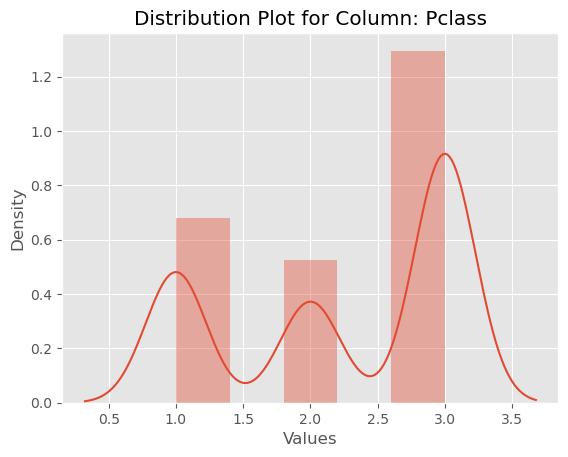

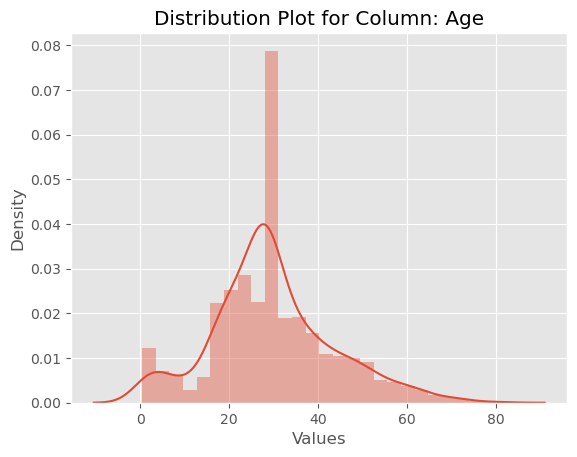

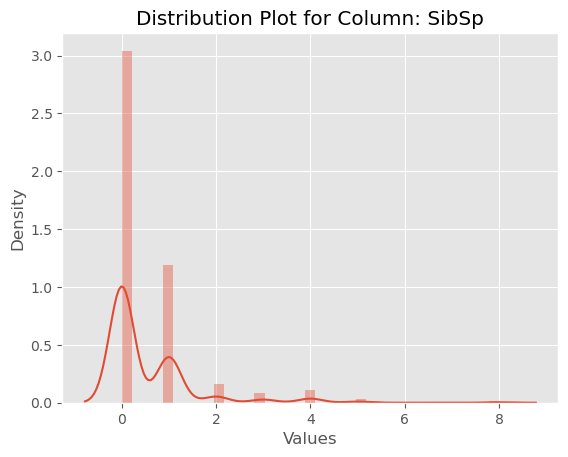

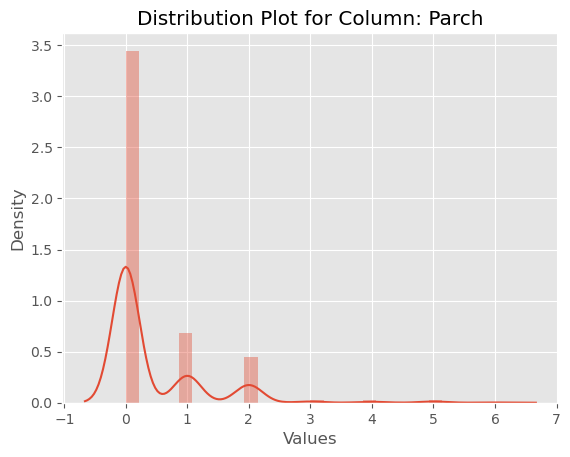

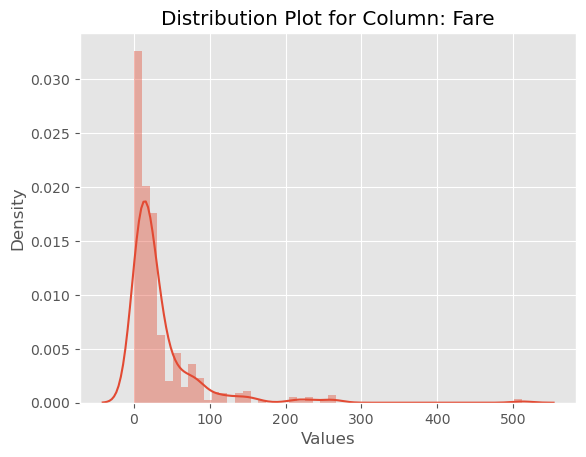

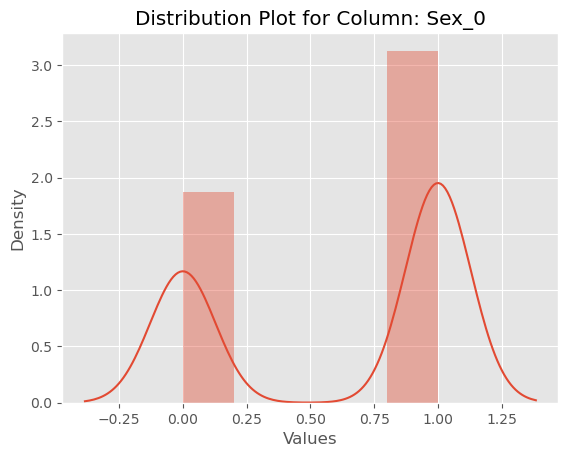

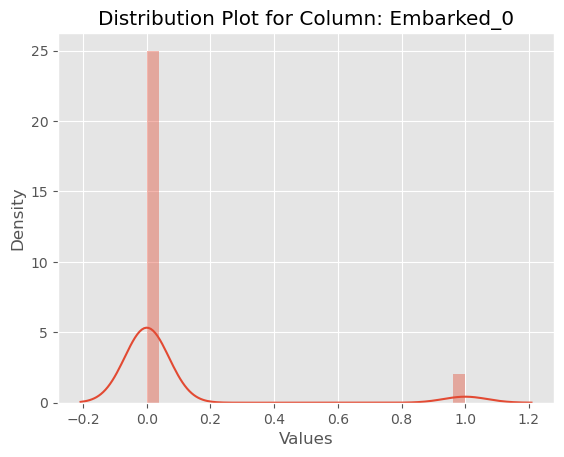

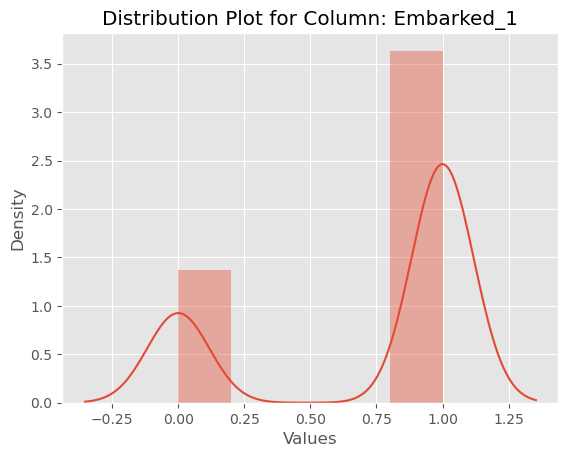

In [45]:
display_distribution_plots(features_tr)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

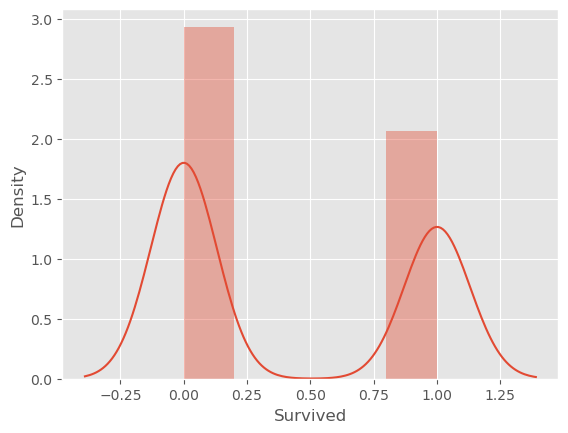

In [46]:
sns.distplot(target_tr)

In [47]:
target_tr.value_counts()

0    458
1    322
Name: Survived, dtype: int64

In [48]:
features_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      780 non-null    int64  
 1   Age         780 non-null    float64
 2   SibSp       780 non-null    int64  
 3   Parch       780 non-null    int64  
 4   Fare        780 non-null    float64
 5   Sex_0       780 non-null    float64
 6   Embarked_0  780 non-null    float64
 7   Embarked_1  780 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 48.9 KB


# Scaling Training data as all ranges are different

In [58]:
scaler = StandardScaler()
scaler.fit(features_tr)
X_train=scaler.transform(features_tr)

In [59]:
X_train

array([[ 0.88282317, -0.55207178,  0.48040606, ...,  0.77353775,
        -0.28342973,  0.61291221],
       [-1.45936076,  0.61462861,  0.48040606, ..., -1.29276172,
        -0.28342973, -1.63155503],
       [ 0.88282317, -0.26039668, -0.53234185, ..., -1.29276172,
        -0.28342973,  0.61291221],
       ...,
       [ 0.88282317, -0.11455913,  0.48040606, ..., -1.29276172,
        -0.28342973,  0.61291221],
       [-1.45936076, -0.26039668, -0.53234185, ...,  0.77353775,
        -0.28342973, -1.63155503],
       [ 0.88282317,  0.17711596, -0.53234185, ...,  0.77353775,
         3.52821143, -1.63155503]])

In [60]:
Y_train = df_tr_target

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,stratify=Y_train,test_size=0.2,random_state=1)

# Training a Logistic Regression Model

In [62]:
#Implement Logistic Regression Model
model=LogisticRegression().fit(X_train,Y_train)

In [77]:
Y_pred = model.predict(X_test)

In [78]:
Y_pred_prob = model.predict_proba(X_test)[:,1]

Training Accuracy:  0.7964743589743589
Testing Accuracy:  0.7435897435897436
Classification Report:                precision    recall  f1-score   support

           0       0.77      0.80      0.79        92
           1       0.70      0.66      0.68        64

    accuracy                           0.74       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.74      0.74       156

[[74 18]
 [22 42]] : Confusion Matrix


Text(0.5, 1.0, 'Confusion matrix')

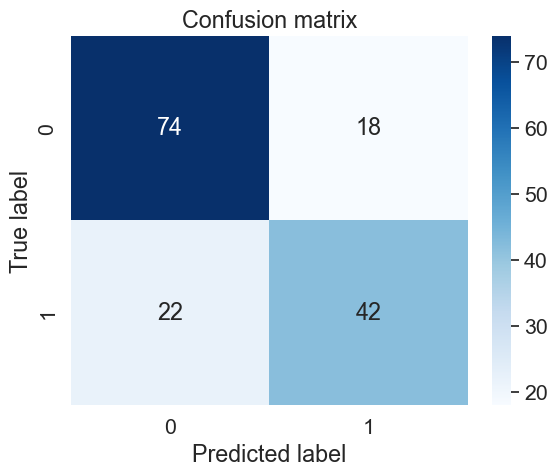

In [79]:
train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report: ", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

Text(0.5, 1.0, 'Logistic Regression Predictions')

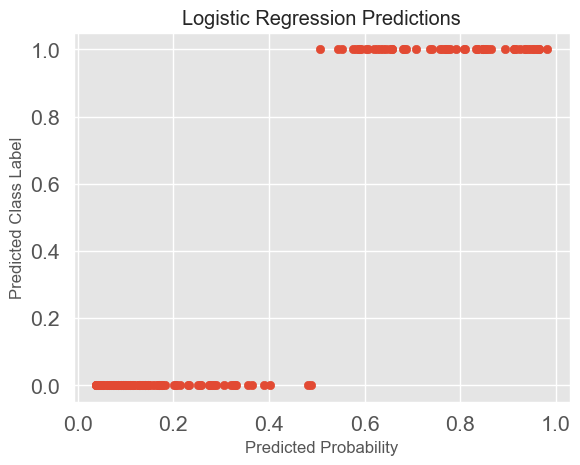

In [92]:
plt.scatter(Y_pred_prob, Y_pred)
plt.xlabel("Predicted Probability")
plt.ylabel("Predicted Class Label")
plt.title("Logistic Regression Predictions")

# KNN

In [217]:
#selecting the optimal value of k
params = {"n_neighbors":range(1,21)}
gsv=GridSearchCV(KNeighborsClassifier(),params).fit(X_train,Y_train)

print("The optimum number of neighbors are :",gsv.best_params_)
print("The best score is :",gsv.best_score_)

The optimum number of neighbors are : {'n_neighbors': 13}
The best score is : 0.806116129032258


Training Accuracy:  0.8285256410256411
Testing Accuracy:  0.782051282051282
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        92
           1       0.77      0.67      0.72        64

    accuracy                           0.78       156
   macro avg       0.78      0.77      0.77       156
weighted avg       0.78      0.78      0.78       156

[[79 13]
 [21 43]] : Confusion Matrix


<AxesSubplot:>

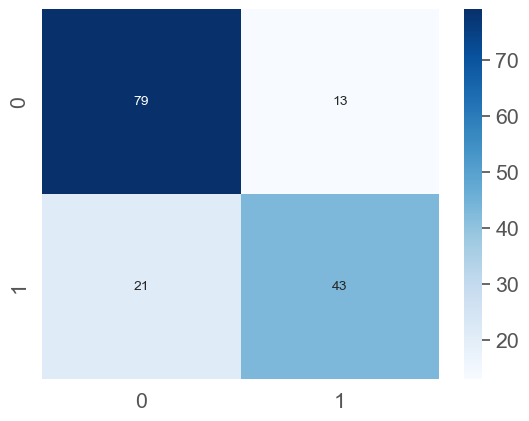

In [93]:
#KNN 
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

Y_pred = knn.predict(X_test)
Y_pred_proba = knn.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, knn.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

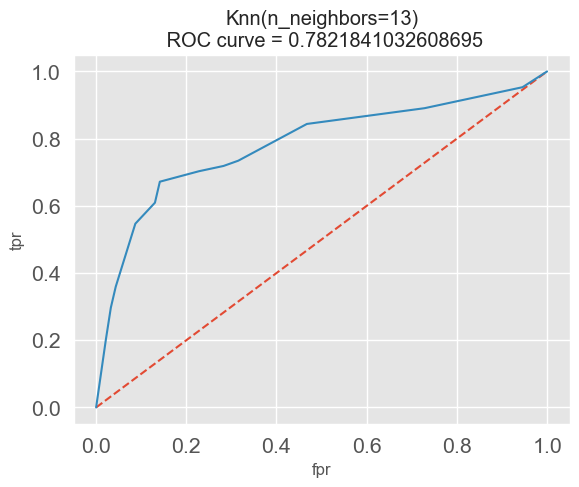

In [101]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=13)\n ROC curve = ' + str(roc_auc_score(Y_test,Y_pred_proba)))
plt.show()

# Decision Tree Classifier

In [219]:
# Define Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to search
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=params, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8109548387096774


Training Accuracy:  0.8541666666666666
Testing Accuracy:  0.75
Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        92
           1       0.72      0.64      0.68        64

    accuracy                           0.75       156
   macro avg       0.74      0.73      0.74       156
weighted avg       0.75      0.75      0.75       156

[[76 16]
 [23 41]] : Confusion Matrix


<AxesSubplot:>

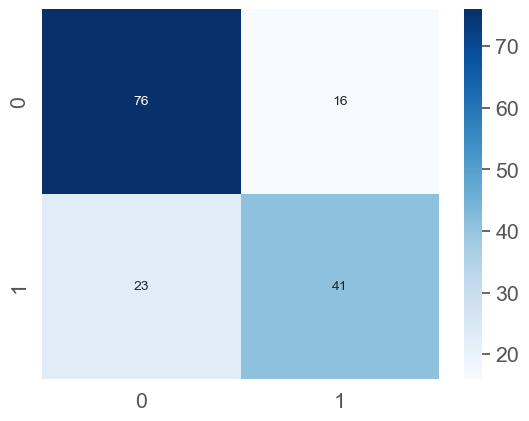

In [231]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_leaf=1, min_samples_split=2)

dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)



Y_pred = dtc.predict(X_test)
Y_pred_proba = dtc.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, dtc.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

# Random Forest Classifier

In [226]:
rfc=RandomForestClassifier(random_state=100)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200]})

In [227]:
# Print the best parameters and score
print("Best parameters:", CV_rfc.best_params_)
print("Best score:", CV_rfc.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Best score: 0.8141025641025642


Training Accuracy:  0.9230769230769231
Testing Accuracy:  0.75
Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        92
           1       0.74      0.61      0.67        64

    accuracy                           0.75       156
   macro avg       0.75      0.73      0.73       156
weighted avg       0.75      0.75      0.75       156

[[78 14]
 [25 39]] : Confusion Matrix


<AxesSubplot:>

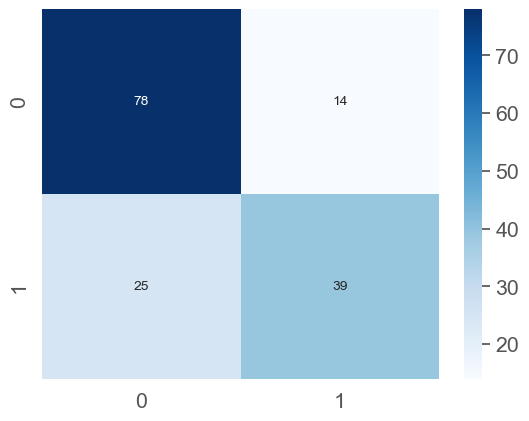

In [229]:
rfc1=RandomForestClassifier(random_state=100, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')

rfc1.fit(X_train,Y_train)
rfc1.score(X_test,Y_test)



Y_pred = rfc1.predict(X_test)
Y_pred_proba = rfc1.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, rfc1.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

In [234]:
reg_pipeline = Pipeline([('Logreg',LogisticRegression())])
knn_pipeline=Pipeline([('knn',KNeighborsClassifier(n_neighbors=13))])
dtree_pipeline = Pipeline([('dtree',DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_leaf=1, min_samples_split=2))])
rf_pipline = Pipeline([('Random Forest',RandomForestClassifier(random_state=100, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini'))])

In [235]:
my_pipeline = [reg_pipeline,dtree_pipeline,knn_pipeline,rf_pipline]

In [238]:
model_list = []
pred_list = []
trn_acc = []
test_acc = []
for model in my_pipeline:
    mod=model.fit(X_train,Y_train)
    model_list.append(mod)
    p_tr=model.predict(X_train)
    trn_acc.append(accuracy_score(Y_train,p_tr))
    p_test=model.predict(X_test)
    test_acc.append(accuracy_score(Y_test,p_test))

In [239]:
output = pd.DataFrame({"model_name":model_list,"Train Accuracy":trn_acc,"Test Accuracy":test_acc})

In [240]:
output

,model_name,Train Accuracy,Test Accuracy
0,(LogisticRegression()),0.796474,0.743590
1,"(DecisionTreeClassifier(criterion='entropy', m...",0.854167,0.750000
2,(KNeighborsClassifier(n_neighbors=13)),0.828526,0.782051
3,"((DecisionTreeClassifier(max_depth=8, max_feat...",0.923077,0.750000


# Implementing the KNN model on the testing dataset since KNN seems to give us the best accuracy

In [244]:
scaler = StandardScaler()
scaler.fit(df_test3)
Lin_test=scaler.transform(df_test3)

In [245]:
Lin_pred = knn.predict(Lin_test)

In [249]:
df_test1['Predicted Survivors'] = Lin_pred

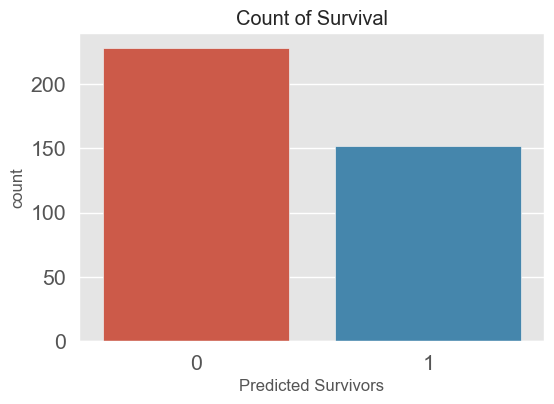

In [257]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Predicted Survivors', data=df_test1)
plt.title("Count of Survival")
plt.show()

In [281]:
n=len(df_test1)
surv_0=len(df_test1[df_test1['Predicted Survivors']==0])
surv_1=len(df_test1[df_test1['Predicted Survivors']==1])

print("% of passanger survived in the test dataset: ",surv_1*100/n)
print("% of passanger not survived in the test dataset: ",surv_0*100/n)

% of passanger survived in the test dataset:  40.0
% of passanger not survived in the test dataset:  60.0


# Predicted Survivors x Fare

In [260]:
grouping_fare = df_test1.groupby(['Predicted Survivors','Fare'])

In [265]:
grouping_fare.first()

Pclass     Sex    Age  SibSp  Parch Embarked
Predicted Survivors Fare                                                  
0                   0.0000         1    male  49.00      0      0        S
                    3.1708         3    male   9.00      0      1        S
                    6.4375         3    male  27.50      0      0        C
                    6.4958         3    male  21.00      1      0        S
                    7.0000         3  female  47.00      1      0        S
                    7.0500         3    male  27.50      0      0        S
                    7.2250         3    male  21.00      0      0        C
                    7.2292         3    male  18.50      0      0        C
                    7.2500         3    male  28.00      0      0        S
                    7.5500         3    male  24.00      0      0        S
                    7.5750         3    male  27.50      0      0        S
                    7.5792         3    male  32.00      0      0        S
                    7.6500         3    male  25.00      0      0        S
                    7.7333         3    male  31.00      0      0        Q
                    7.7500         3    male  27.50      0      0        Q
                    7.7750         3    male  27.50      0      0        S
                    7.7958         3    male  25.00      0      0        S
                    7.8208         3    male  21.00      0      0        Q
                    7.8292         3    male  34.50      0      0        Q
                    7.8500         3    male  41.00      0      0        S
                    7.8542         3    male  24.00      0      0        S
                    7.8792         3    male  27.50      0      0        Q
                    7.8875         3    male  27.50      0      0        S
                    7.8958         3    male  27.50      0      0        S
                    7.9250         3  female  27.00      1      0        S
                    8.0500         3  female  27.50      0      0        S
                    8.1125         3  female  27.50      0      0        S
                    8.6625         3    male  27.00      0      0        S
                    8.7125         3    male  27.50      0      0        S
                    9.2250         3    male  14.00      0      0        S
                    9.3250         3    male  24.00      0      0        S
                    9.5000         3    male  25.00      0      0        S
                    9.6875         2    male  62.00      0      0        Q
                    10.5000        2    male  23.00      0      0        S
                    10.7083        2    male  27.50      0      0        Q
                    11.5000        2    male  21.00      1      0        S
                    12.3500        2    male  35.00      0      0        Q
                    12.7375        2    male  30.00      0      0        C
                    12.8750        2    male  27.50      0      0        S
                    13.0000        2    male  30.00      0      0        S
                    13.4167        3    male  39.00      0      1        C
                    13.5000        2    male  32.00      0      0        S
                    13.8583        2    male  29.00      0      0        C
                    13.8625        2    male  20.00      0      0        C
                    13.9000        3    male  23.00      1      0        S
                    14.1083        3  female  45.00      1      0        S
                    14.4542        3    male  27.50      1      0        C
                    14.4583        3    male  27.50      1      0        C
                    14.5000        3    male  50.00      1      0        S
                    15.0333        2    male  27.00      0      0        C
                    15.0458        2    male  41.00      0      0        C
                    15.1000        3    male  40.50    

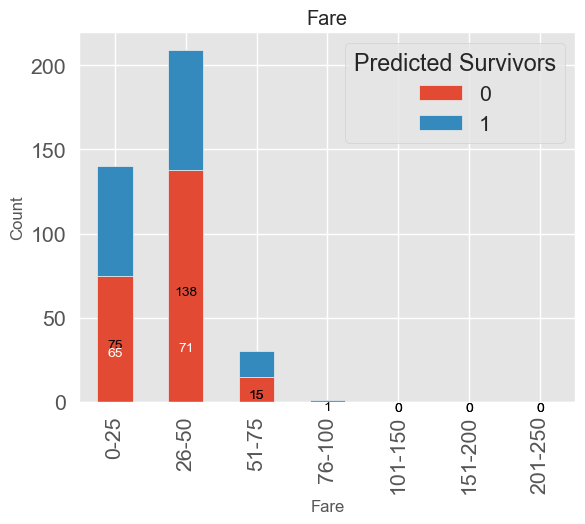

In [285]:
df_test6 = df_test1

# Create a new column that represents the age bins for each individual
bins = [0,25, 50, 75, 100, 200, 250, 300]
labels = ['0-25','26-50', '51-75','76-100', '101-150', '151-200', '201-250']
df_test6['age_bin'] = pd.cut(df_test6['Age'], bins=bins, labels=labels)

grouped = df_test6.groupby(['Predicted Survivors', 'age_bin']).size()

grouped_df = grouped.unstack('Predicted Survivors')

# Plot the grouped data as a stacked bar chart
grouped_df.plot(kind='bar', stacked=True)
totals = grouped_df.sum(axis=1)
for i in range(len(grouped_df.index)):
    total = totals[i]
    for col in grouped_df.columns:
        value = grouped_df.loc[grouped_df.index[i], col]
        plt.text(i, value / 2, str(value), ha="center", va="top", color="white" if value/total < 0.5 else "black")

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare')
plt.show()

# Fare does not seem to have much affect on the predicted survivors

# Predicted Survivors x Age

In [275]:
grouping_age = df_test1.groupby(['Predicted Survivors','Age'])
grouping_age.first()

Pclass     Sex  SibSp  Parch      Fare Embarked
Predicted Survivors Age                                                   
0                   5.00        3    male      4      2   31.3875        S
                    6.00        3    male      3      1   21.0750        S
                    9.00        3    male      0      1    3.1708        S
                    10.00       3    male      4      1   29.1250        Q
                    13.00       3    male      4      2   31.3875        S
                    14.00       3    male      0      0    9.2250        S
                    14.50       3    male      8      2   69.5500        S
                    17.00       3    male      0      0    7.8958        S
                    18.00       3    male      0      0    7.7500        S
                    18.50       3    male      0      0    7.2292        C
                    19.00       2    male      0      0   10.5000        S
                    20.00       3    male      0      0    7.8542        S
                    21.00       3    male      2      0   24.1500        S
                    22.00       3    male      0      0    7.7958        S
                    22.50       3    male      0      0    7.2250        C
                    23.00       3    male      1      0   13.9000        S
                    24.00       2    male      2      0   31.5000        S
                    25.00       3    male      0      0    9.5000        S
                    26.00       2    male      1      1   29.0000        S
                    26.50       3    male      0      0    7.2250        C
                    27.00       3    male      0      0    8.6625        S
                    27.50       3    male      0      0    7.8958        S
                    28.00       3    male      0      0   22.5250        S
                    29.00       3  female      0      0    7.9250        S
                    30.00       2    male      0      0   13.0000        S
                    31.00       3    male      3      0   18.0000        S
                    32.00       2    male      0      0   13.5000        S
                    32.50       1    male      0      0  211.5000        C
                    33.00       3  female      1      2   20.5750        S
                    34.00       2    male      1      0   26.0000        S
                    34.50       3    male      0      0    7.8292        Q
                    35.00       2    male      0      0   12.3500        Q
                    36.00       2    male      0      0   13.0000        S
                    36.50       3    male      1      0   17.4000        S
                    37.00       1    male      1      1   83.1583        C
                    38.00       3  female      4      2    7.7750        S
                    38.50       3    male      0      0    7.2500        S
                    39.00       3    male      0      1   13.4167        C
                    40.00       3    male      1      6   46.9000        S
                    40.50       3    male      0      0   15.1000        S
                    41.00       1    male      0      0   30.5000        S
                    42.00       2    male      0      0   13.0000        S
                    43.00       3    male      0      0    7.8958        S
                    44.00       2    male      0      0   13.0000        S
                    45.00       3  female      0      0    7.2250        C
                    46.00       1    male      0      0   26.0000        S
                    47.00       3  female      1      0    7.0000        S
                    48.00       1    male      0      0   50.4958        C
                    49.00       1    male      0      0   26.0000        S
                    50.00       3    male      1      0   14.5000        S
                    53.00       1    male      0      0   28.5000        C
                    54.00       1    male      1    

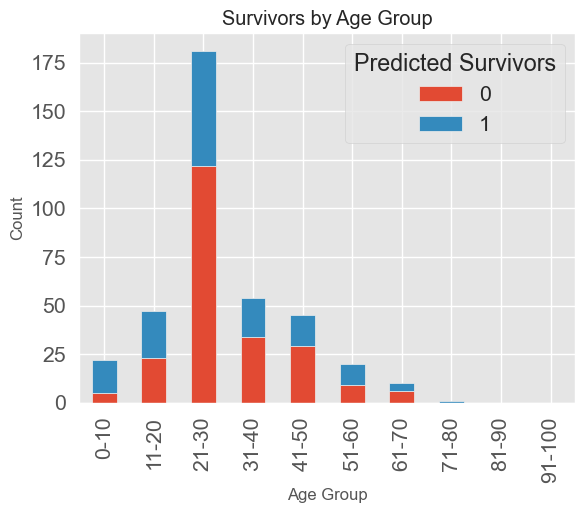

In [277]:
df_test7 = df_test1

# Create a new column that represents the age bins for each individual
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_test7['age_bin'] = pd.cut(df_test7['Age'], bins=bins, labels=labels)

grouped = df_test7.groupby(['Predicted Survivors', 'age_bin']).size()

grouped_df = grouped.unstack('Predicted Survivors')

# Plot the grouped data as a stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survivors by Age Group')
plt.show()

# More than 50% of the passengers above the age of 20 seem to have perished

# Predicted Survivors x Sex

In [278]:
grouping_sex = df_test1.groupby(['Predicted Survivors','Sex'])
grouping_sex.first()

Pclass   Age  SibSp  Parch     Fare Embarked  \
Predicted Survivors Sex                                                    
0                   female       3  47.0      1      0   7.0000        S   
                    male         3  34.5      0      0   7.8292        Q   
1                   female       3  22.0      1      1  12.2875        S   
                    male         1  21.0      0      1  61.3792        C   

                           age_bin  
Predicted Survivors Sex             
0                   female   41-50  
                    male     31-40  
1                   female   21-30  
                    male     21-30

In [279]:
df_test1.groupby(['Sex','Predicted Survivors']).size()

Sex     Predicted Survivors
female  0                       20
        1                      124
male    0                      208
        1                       28
dtype: int64

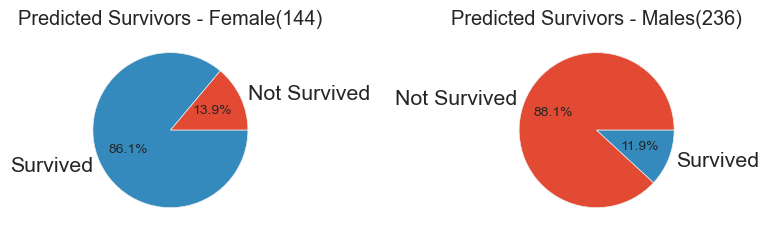

In [280]:
# group by sex and predicted survivors
grouped = df_test1.groupby(['Sex', 'Predicted Survivors']).size()

labels = ['Not Survived', 'Survived']

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# plot the pie chart for females on the first subplot
female = grouped['female']
ax1.pie(female, labels=labels, autopct='%1.1f%%')
ax1.set_title('Predicted Survivors - Female(144)')

# plot the pie chart for males on the second subplot
male = grouped['male']
ax2.pie(male, labels=labels, autopct='%1.1f%%')
ax2.set_title('Predicted Survivors - Males(236)')

# adjust the positions of the subplots
fig.subplots_adjust(wspace=1.2)

# show the plot
plt.show()

# Alot more females have survived in comparison to males

# Predicted Survivors x Embarked

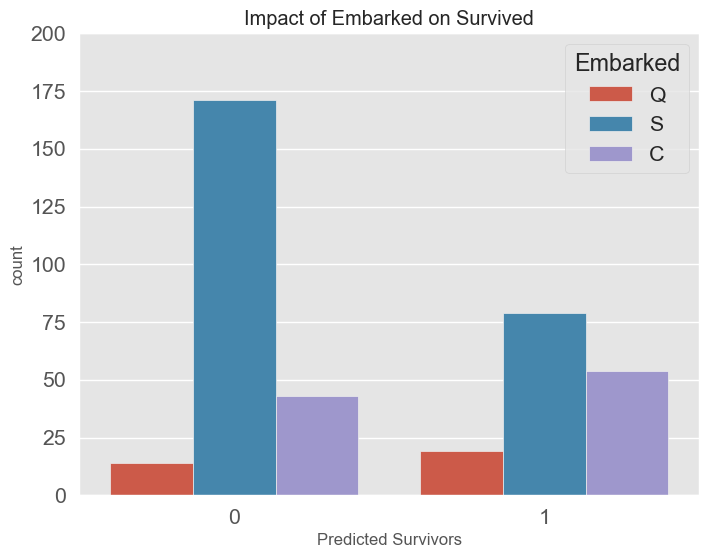

In [287]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Predicted Survivors', data=df_test1, hue='Embarked')
ax.set_ylim(0,200)
plt.title("Impact of Embarked on Survived")
plt.show()

# Ratio of Survived and Not Survived passengers for S and Q Embarked are similar but Passengers from C embarked have higer chances of survival.